In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
import pickle

import catboost as cb
print("cb.__version__:", cb.__version__)

# local modules
import sys
sys.path.append("../src")
from preproc import process_train_data, process_test_data

cb.__version__: 1.2.7


***
### load and preprocess data

In [2]:
# define some paths
path_raw = Path("../data/raw")
path_processed = Path("../data/processed")
path_results = Path("../data/results")

# load data
df_train = pd.read_csv(path_raw / "train.csv")
df_test = pd.read_csv(path_raw / "test.csv")

df_train

Id GameRulesetName                                        agent1  \
0            0             00Y        MCTS-ProgressiveHistory-0.1-MAST-false   
1            1             00Y        MCTS-ProgressiveHistory-0.1-MAST-false   
2            2             00Y         MCTS-ProgressiveHistory-0.1-MAST-true   
3            3             00Y         MCTS-ProgressiveHistory-0.1-MAST-true   
4            4             00Y         MCTS-ProgressiveHistory-0.1-MAST-true   
...        ...             ...                                           ...   
233229  233229     Zuz_Mel_7x7        MCTS-UCB1Tuned-1.41421356237-NST-false   
233230  233230     Zuz_Mel_7x7  MCTS-UCB1Tuned-1.41421356237-Random200-false   
233231  233231     Zuz_Mel_7x7  MCTS-UCB1Tuned-1.41421356237-Random200-false   
233232  233232     Zuz_Mel_7x7  MCTS-UCB1Tuned-1.41421356237-Random200-false   
233233  233233     Zuz_Mel_7x7   MCTS-UCB1Tuned-1.41421356237-Random200-true   

                                                   agent2  Properties  Format  \
0             MCTS-ProgressiveHistory-0.6-Random200-false           1       1   
1                             MCTS-UCB1GRAVE-0.6-NST-true           1       1   
2                                 MCTS-UCB1-0.1-NST-false           1       1   
3                                 MCTS-UCB1-0.6-NST-false           1       1   
4                  MCTS-UCB1GRAVE-1.41421356237-NST-false           1       1   
...                                                   ...         ...     ...   
233229  MCTS-ProgressiveHistory-1.41421356237-Random20...           1       1   
233230                           MCTS-UCB1-0.6-MAST-false           1       1   
233231             MCTS-UCB1GRAVE-1.41421356237-NST-false           1       1   
233232              MCTS-UCB1GRAVE-1.41421356237-NST-true           1       1   
233233                      MCTS-UCB1Tuned-0.6-MAST-false           1       1   

        Time  Discrete  Realtime  Turns  ...  DoLudeme  Trigger  \
0          1         1         0      1  ...         0        1   
1          1         1         0      1  ...         0        1   
2          1         1         0      1  ...         0        1   
3          1         1         0      1  ...         0        1   
4          1         1         0      1  ...         0        1   
...      ...       ...       ...    ...  ...       ...      ...   
233229     1         1         0      1  ...         0        0   
233230     1         1         0      1  ...         0        0   
233231     1         1         0      1  ...         0        0   
233232     1         1         0      1  ...         0        0   
233233     1         1         0      1  ...         0        0   

        PlayoutsPerSecond  MovesPerSecond  \
0                  298.07        18877.17   
1                  298.07        18877.17   
2                  298.07        18877.17   
3                  298.07        18877.17   
4                  298.07        18877.17   
...                   ...             ...   
233229             157.52       157174.58   
233230             157.52       157174.58   
233231             157.52       157174.58   
233232             157.52       157174.58   
233233             157.52       157174.58   

                                             EnglishRules  \
0       Goal: Connect all three edge colors with a sin...   
1       Goal: Connect all three edge colors with a sin...   
2       Goal: Connect all three edge colors with a sin...   
3       Goal: Connect all three edge colors with a sin...   
4       Goal: Connect all three edge colors with a sin...   
...                                                   ...   
233229  7x7 board. 24 pieces per player. Pieces begin ...   
233230  7x7 board. 24 pieces per player. Pieces begin ...   
233231  7x7 board. 24 pieces per player. Pieces begin ...   
233232  7x7 board. 24 pieces per player. Pieces begin ...   
233233  7x7 board. 24 pieces per player. Pieces begin ...   


In [3]:
!ls ../feat_selection | grep json

feat_selection_intersection_at_95.json
feat_selection_intersection_at_96.json
feat_selection_intersection_at_97.json
feat_selection_intersection_at_98.json
feat_selection_intersection_at_99.json
feat_selection_union_at_80.json
feat_selection_union_at_85.json
feat_selection_union_at_90.json
feat_selection_union_at_95.json
select_optuna_catb.json
select_optuna_combined_v23.json
select_optuna_combined_v24.json
select_optuna_combined_v34.json
select_optuna_lgbm_v1.json
select_optuna_lgbm_v2.json
select_optuna_lgbm_v3.json


In [4]:
# # Load the feature selection results
with open('../feat_selection/select_optuna_lgbm_v2.json', 'r') as f:
    feature_selection = json.load(f)

# with open('../feat_selection/select_optuna_lgbm_v3.json', 'r') as f:
#     feature_selection_lgbm = json.load(f)

# with open('../feat_selection/select_optuna_catb.json', 'r') as f:
#     feature_selection_catb = json.load(f)

# with open('../feat_selection/select_optuna_combined_v23.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/select_optuna_combined_v24.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/select_optuna_combined_v34.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_intersection_at_95.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_intersection_at_96.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_intersection_at_97.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_intersection_at_98.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_intersection_at_99.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_union_at_80.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_union_at_85.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_union_at_90.json', 'r') as f:
#     feature_selection = json.load(f)

# with open('../feat_selection/feat_selection_union_at_95.json', 'r') as f:
#     feature_selection = json.load(f)


# Extract the selected features
numerical_cols = feature_selection.get('numerical', [])
categorical_cols = feature_selection.get('categorical', [])

# text_cols = ["LudRules",]
text_cols = list()

print("Numerical features:", len(numerical_cols))
print("Categorical features:", len(categorical_cols))
print("Text features:", len(text_cols))

Numerical features: 296
Categorical features: 5
Text features: 0


In [5]:
df_train, numerical_cols, categorical_cols, encoder, scaler = process_train_data(
    df_train,
    scale=False,
    numerical_cols=numerical_cols,
    categorical_cols=categorical_cols,
    include_position_features=True,
    include_text_features=False,
)

text_cols = list()

# Print the results
print("Numerical Columns:", len(numerical_cols))
print("Categorical Columns:", len(categorical_cols))

number of all nan cols:  0
number of constant cols:  0
Numerical Columns: 368
Categorical Columns: 5


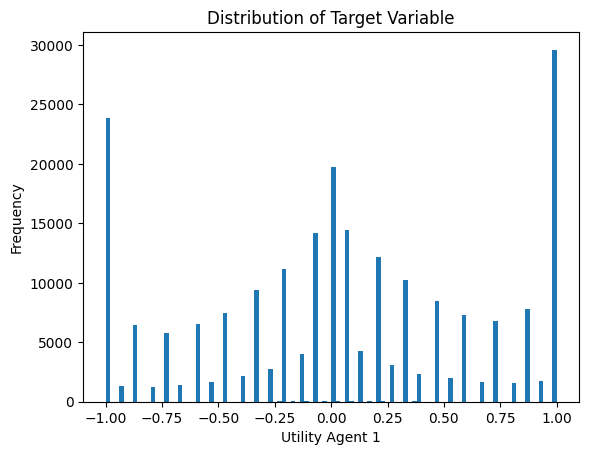

In [6]:
plt.hist(df_train['utility_agent1'], bins=100)
plt.title('Distribution of Target Variable')
plt.xlabel('Utility Agent 1')
plt.ylabel('Frequency')
plt.show()

In [7]:
split1 = pickle.load(open('../data/splits/cv1_Game.pkl', 'rb'))
split2 = pickle.load(open('../data/splits/cv2_Game.pkl', 'rb'))
split3 = pickle.load(open('../data/splits/cv3_Game.pkl', 'rb'))

# split1 = pickle.load(open('../data/splits/cv1_GameRulesetName.pkl', 'rb'))
# split2 = pickle.load(open('../data/splits/cv2_GameRulesetName.pkl', 'rb'))
# split3 = pickle.load(open('../data/splits/cv3_GameRulesetName.pkl', 'rb'))

***
### train model

In [8]:
def get_feature_importance(model, importance_type='PredictionValuesChange'):
    """
    Get feature importance from a trained CatBoost model
    
    Args:
        model: Trained CatBoost model
        importance_type: Type of feature importance to calculate
            Options: 'PredictionValuesChange', 'LossFunctionChange', 
            'ShapValues', 'Interaction', 'TopKitty'
        
    Returns:
        pandas.DataFrame: DataFrame containing feature names and their importance scores
    """
    # Get feature importance scores
    importance_scores = model.get_feature_importance(type=importance_type)
    feature_names = model.feature_names_
    
    # Create dataframe with feature names and importance scores
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance_scores
    }).sort_values('importance', ascending=False, ignore_index=True)
    
    return importance_df


def plot_feature_importance(importance_df, top_n=100):
    plot_df = importance_df.head(top_n)
    
    plt.figure(figsize=(15, 5))
    plt.bar(x=range(len(plot_df)), height=plot_df['importance'])
    plt.xticks(range(len(plot_df)), plot_df['feature'], rotation=45, ha='right', fontsize=8)
    plt.ylabel('Importance Score')
    plt.title(f'Top {top_n} Most Important Features')
    plt.tight_layout()
    plt.show()

In [9]:
def train_models(
        df_train,
        numerical_cols,
        categorical_cols,
        text_cols,
        target='utility_agent1',
        split_list=None,
    ):
    # Define the parameters for CatBoost
    params = {

        'objective': "RMSE",
        'learning_rate': 0.1,
        'depth': 10,
        'iterations': 3000,
        'eval_metric': 'RMSE',
        'verbose': 0,
        'random_seed': 2112,
        'l2_leaf_reg': 1.,
        'random_strength': 0.2,
        'min_data_in_leaf': 50,
        'rsm': 0.8,
        'bagging_temperature' : 0.50,

        # 'text_processing': {
        #     'tokenizers': [{
        #         'tokenizer_id': 'Space',  # or 'GPT', 'Bert', etc.
        #         'separator_type': 'Space'
        #     }],
        #     'dictionaries': [{
        #         'dictionary_id': 'BiGram',
        #         'max_dictionary_size': '50000',
        #         'occurrence_lower_bound': '3',
        #         'gram_order': '2'
        #     }],
        #     'feature_calcers': [{
        #         'calcer_type': 'BoW',  # or 'NaiveBayes', 'BM25'
        #         'dictionary_id': 'BiGram'
        #     }]
        # }


        # # Text processing parameters to mimic TF-IDF
        # 'tokenizers': [{
        #     'tokenizer_id': 'Space',
        #     'separator_type': 'ByDelimiter',
        #     'delimiter': ' '
        # }],
        # 'dictionaries': [{
        #     'dictionary_id': 'NgramDict',
        #     'max_dictionary_size': '500',  # Match max_features=500
        #     'occurrence_lower_bound': '3',
        #     'gram_order': '3',  # Maximum n-gram size
        #     'min_gram_order': '2'  # Minimum n-gram size
        # }],
        # 'feature_calcers': [{
        #     'calcer_type': 'BoW',  # Most similar to TF-IDF
        #     'dictionary_id': 'NgramDict'
        # }],


        # 'tokenizers': [{
        #     'tokenizer_id': 'Space',
        #     'delimiter': ' ',
        #     'separator_type': 'ByDelimiter'
        # }],
        # 'dictionaries': [{
        #     'dictionary_id': 'Word',
        #     'max_dictionary_size': '50000',
        #     'occurrence_lower_bound': '3'
        # }],
        # 'feature_calcers': [{
        #     'calcer_type': 'BoW',
        #     'dictionary_id': 'Word',
        # }]
    }
    # Obtained with optuna
    # params = {
    #     'objective': 'RMSE',
    #     'verbose': False,
    #     'random_seed': 2112,
    #     'learning_rate': 0.1,
    #     'iterations': 3000,
    #     'bootstrap_type': 'Bayesian',
    #     'sampling_frequency': 'PerTreeLevel',
    #     'depth': 10,
    #     'l2_leaf_reg': 0.9359292512255313,
    #     'random_strength': 0.16693257025108216,
    #     'bagging_temperature': 0.15967219011745193,
    #     'rsm': 0.548125395769786,
    #     'min_data_in_leaf': 102,
    #     'max_ctr_complexity': 10
    # }

    trained_models = []
    oof = pd.DataFrame(
        index=df_train.index,
        columns=[f'{target}_true', f'{target}_pred', 'fold']
    )
    oof_scores = []
    feat_importance_dfs = []

    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(split_list, 1):
        print(f"Fold {fold}")
        
        # Split the data
        X_train, X_valid = df_train.iloc[train_index], df_train.iloc[val_index]
        y_train, y_valid = X_train[target], X_valid[target]

        # Initialize CatBoost Pool
        train_pool = cb.Pool(
            # data=X_train[numerical_cols + categorical_cols + text_cols],
            data=X_train[numerical_cols + categorical_cols],
            label=y_train,
            cat_features=categorical_cols,
            # text_features=text_cols
        )
        val_pool = cb.Pool(
            # data=X_valid[numerical_cols + categorical_cols + text_cols],
            data=X_valid[numerical_cols + categorical_cols],
            label=y_valid,
            cat_features=categorical_cols,
            # text_features=text_cols
        )
        
        # Initialize CatBoost Regressor
        model = cb.CatBoostRegressor(**params)
        
        # Train the model
        model.fit(
            train_pool,
            eval_set=val_pool,
            use_best_model=True,
            verbose=50
        )

        feat_importance = get_feature_importance(model)
        feat_importance = feat_importance.rename(columns={'importance': f'importance_f{fold}'})
        feat_importance_dfs.append(feat_importance)
        plot_feature_importance(feat_importance.rename(columns={f'importance_f{fold}': 'importance'}))
        
        # Save the trained model to the list
        trained_models.append(model)

        # Predict on validation set
        y_pred = model.predict(val_pool)

        # Save out-of-fold predictions
        oof.loc[val_index, f'{target}_true'] = y_valid
        oof.loc[val_index, f'{target}_pred'] = y_pred
        oof.loc[val_index, 'fold'] = fold
        
        # Compute RMSE
        y_pred = np.clip(y_pred, -1, 1)
        rmse = np.sqrt(np.mean((y_pred - y_valid) ** 2))
        print(f"Fold {fold} - RMSE: {rmse}")

        # Save RMSE to the list
        oof_scores.append(rmse)

    # Combine feature importance dataframes
    importance_df = feat_importance_dfs[0]
    for df in feat_importance_dfs[1:]:
        importance_df = importance_df.merge(df, on='feature')
    
    # Calculate mean importance across folds
    importance_cols = [col for col in importance_df.columns if col.startswith('importance_f')]
    importance_df['importance_mean'] = importance_df[importance_cols].mean(axis=1)
    importance_df = importance_df.sort_values('importance_mean', ascending=False, ignore_index=True)
    importance_df['importance_relative'] = (
        importance_df['importance_mean'] / 
        importance_df['importance_mean'].sum()
    )

    # Print the list of oof scores and average oof score
    print("List of oof scores:", oof_scores)
    print("Average oof score:", np.mean(oof_scores))

    return trained_models, oof, oof_scores, importance_df

Fold 1
0:	learn: 0.6130379	test: 0.5464143	best: 0.5464143 (0)	total: 136ms	remaining: 6m 47s
50:	learn: 0.3875128	test: 0.4648319	best: 0.4648319 (50)	total: 3.96s	remaining: 3m 49s
100:	learn: 0.3518160	test: 0.4468953	best: 0.4468953 (100)	total: 7.97s	remaining: 3m 48s
150:	learn: 0.3310630	test: 0.4390077	best: 0.4390077 (150)	total: 11.7s	remaining: 3m 40s
200:	learn: 0.3177345	test: 0.4347845	best: 0.4347755 (199)	total: 15.5s	remaining: 3m 36s
250:	learn: 0.3066207	test: 0.4311939	best: 0.4311939 (250)	total: 19.3s	remaining: 3m 31s
300:	learn: 0.2981742	test: 0.4293132	best: 0.4293132 (300)	total: 23.1s	remaining: 3m 27s
350:	learn: 0.2910264	test: 0.4278743	best: 0.4278623 (349)	total: 27.1s	remaining: 3m 24s
400:	learn: 0.2851502	test: 0.4268852	best: 0.4268625 (398)	total: 31s	remaining: 3m 21s
450:	learn: 0.2794802	test: 0.4262299	best: 0.4262299 (450)	total: 35s	remaining: 3m 17s
500:	learn: 0.2743013	test: 0.4256722	best: 0.4256632 (499)	total: 38.9s	remaining: 3m 13s
55

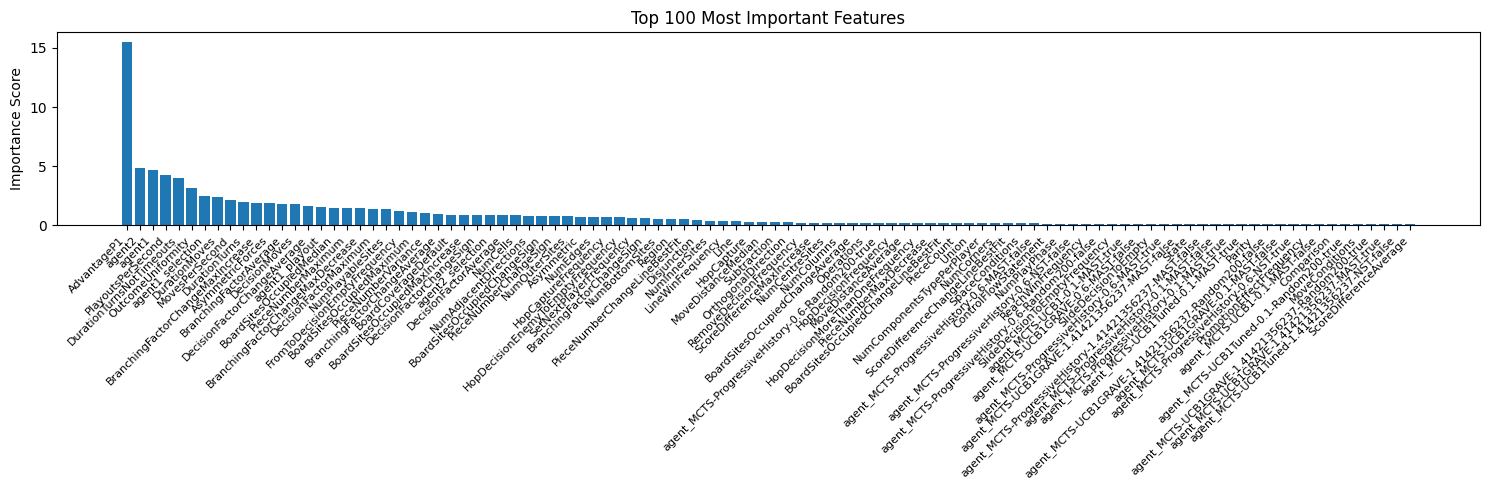

Fold 1 - RMSE: 0.42020773720267796
Fold 2
0:	learn: 0.6070205	test: 0.5814626	best: 0.5814626 (0)	total: 75.9ms	remaining: 3m 47s
50:	learn: 0.3910868	test: 0.4689778	best: 0.4689701 (49)	total: 3.59s	remaining: 3m 27s
100:	learn: 0.3560301	test: 0.4552468	best: 0.4552468 (100)	total: 7.37s	remaining: 3m 31s
150:	learn: 0.3356976	test: 0.4480882	best: 0.4480520 (149)	total: 11s	remaining: 3m 28s
200:	learn: 0.3223269	test: 0.4453940	best: 0.4451681 (198)	total: 14.8s	remaining: 3m 26s
250:	learn: 0.3131616	test: 0.4436296	best: 0.4436026 (249)	total: 18.7s	remaining: 3m 25s
300:	learn: 0.3043642	test: 0.4419565	best: 0.4419565 (300)	total: 22.5s	remaining: 3m 21s
350:	learn: 0.2977004	test: 0.4408360	best: 0.4408360 (350)	total: 26.4s	remaining: 3m 19s
400:	learn: 0.2912467	test: 0.4397084	best: 0.4396781 (392)	total: 30.2s	remaining: 3m 15s
450:	learn: 0.2858596	test: 0.4388685	best: 0.4388616 (446)	total: 34.1s	remaining: 3m 12s
500:	learn: 0.2805769	test: 0.4380378	best: 0.4380378 (

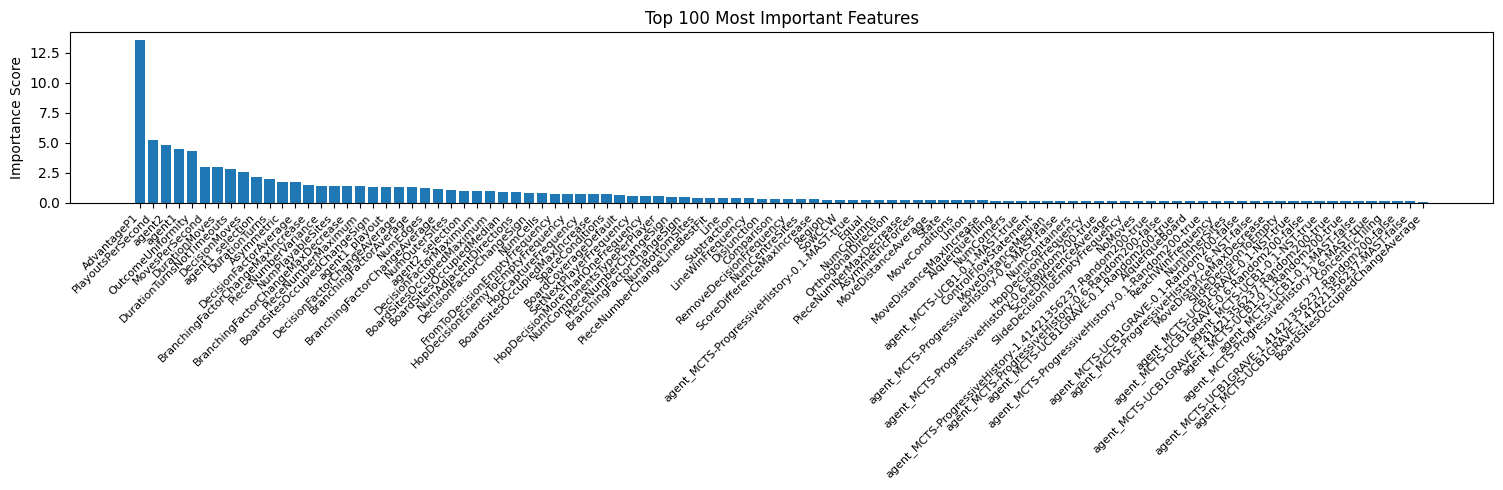

Fold 2 - RMSE: 0.4324039841045965
Fold 3
0:	learn: 0.6030314	test: 0.5940548	best: 0.5940548 (0)	total: 71.2ms	remaining: 3m 33s
50:	learn: 0.3897491	test: 0.4615203	best: 0.4615203 (50)	total: 3.91s	remaining: 3m 46s
100:	learn: 0.3553736	test: 0.4478142	best: 0.4478142 (100)	total: 8.05s	remaining: 3m 51s
150:	learn: 0.3353906	test: 0.4399086	best: 0.4399086 (150)	total: 12.1s	remaining: 3m 48s
200:	learn: 0.3218403	test: 0.4359832	best: 0.4359751 (199)	total: 16.2s	remaining: 3m 45s
250:	learn: 0.3114869	test: 0.4331271	best: 0.4330540 (242)	total: 20.3s	remaining: 3m 42s
300:	learn: 0.3028182	test: 0.4309089	best: 0.4309089 (300)	total: 24.5s	remaining: 3m 39s
350:	learn: 0.2955684	test: 0.4294258	best: 0.4294160 (349)	total: 28.7s	remaining: 3m 36s
400:	learn: 0.2890016	test: 0.4281490	best: 0.4281490 (400)	total: 32.9s	remaining: 3m 33s
450:	learn: 0.2832360	test: 0.4270380	best: 0.4270380 (450)	total: 37.1s	remaining: 3m 29s
500:	learn: 0.2783975	test: 0.4261045	best: 0.4260506 

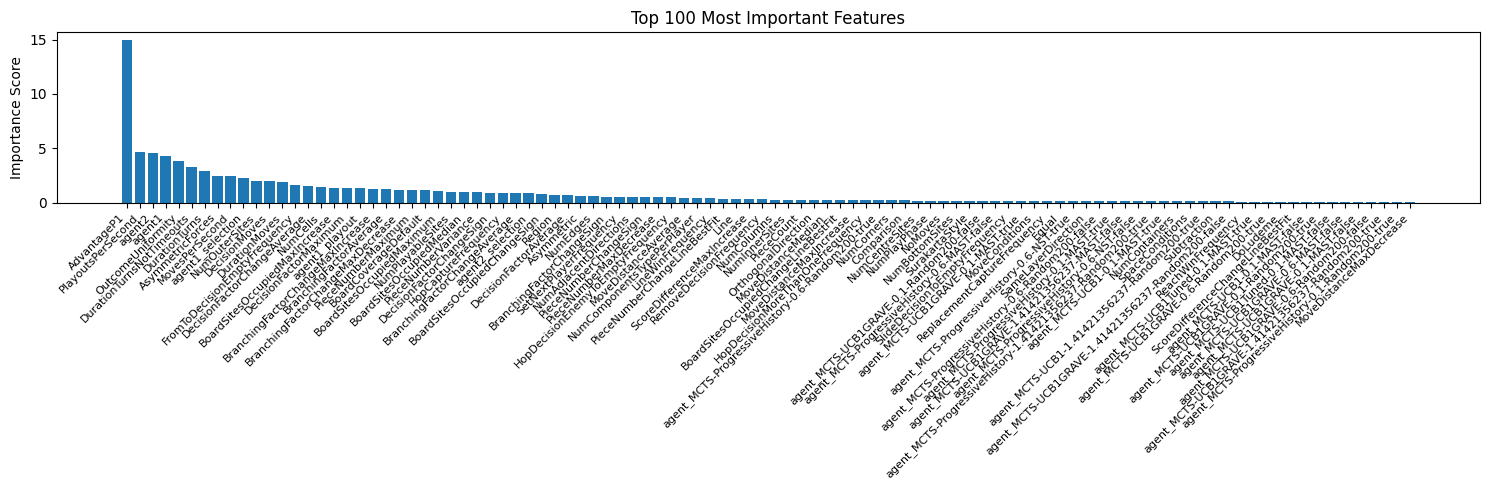

Fold 3 - RMSE: 0.4200207824980687
Fold 4
0:	learn: 0.6039636	test: 0.5895320	best: 0.5895320 (0)	total: 75.8ms	remaining: 3m 47s
50:	learn: 0.3905929	test: 0.4869394	best: 0.4869394 (50)	total: 4s	remaining: 3m 51s
100:	learn: 0.3540465	test: 0.4680040	best: 0.4680040 (100)	total: 8.16s	remaining: 3m 54s
150:	learn: 0.3344172	test: 0.4595062	best: 0.4595062 (150)	total: 12.3s	remaining: 3m 51s
200:	learn: 0.3212544	test: 0.4551081	best: 0.4551081 (200)	total: 16.4s	remaining: 3m 48s
250:	learn: 0.3094175	test: 0.4523947	best: 0.4523834 (249)	total: 20.5s	remaining: 3m 45s
300:	learn: 0.3009227	test: 0.4506232	best: 0.4506232 (300)	total: 24.6s	remaining: 3m 40s
350:	learn: 0.2930348	test: 0.4495232	best: 0.4495232 (350)	total: 28.8s	remaining: 3m 37s
400:	learn: 0.2864842	test: 0.4484430	best: 0.4484430 (400)	total: 33s	remaining: 3m 33s
450:	learn: 0.2808861	test: 0.4471953	best: 0.4471953 (450)	total: 37.2s	remaining: 3m 30s
500:	learn: 0.2758077	test: 0.4464822	best: 0.4464599 (499)

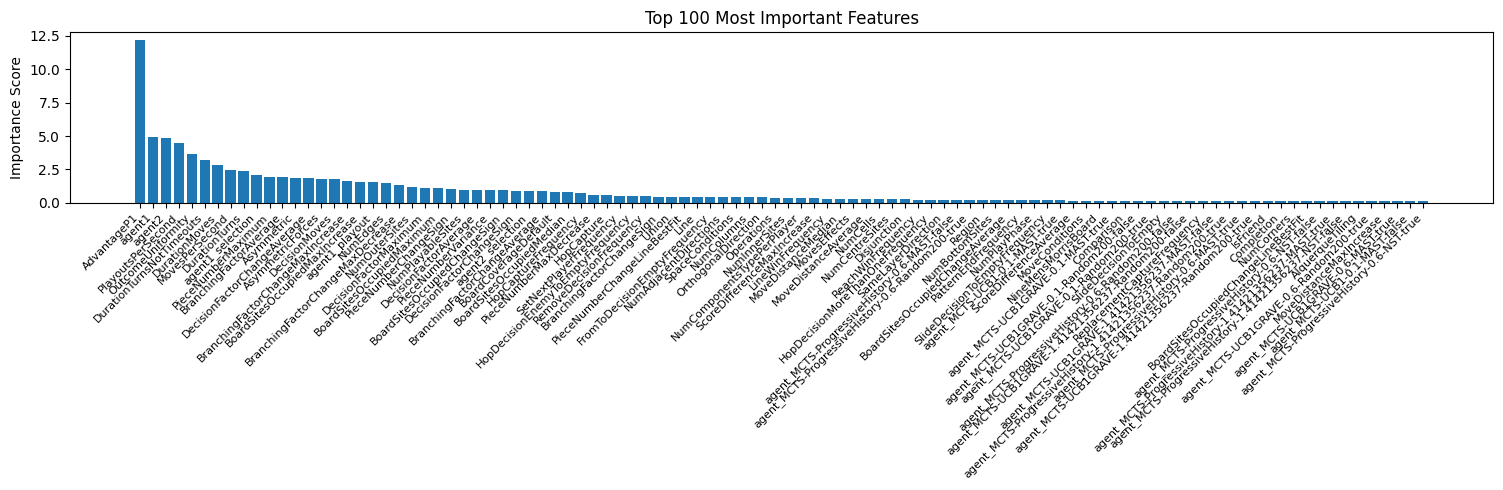

Fold 4 - RMSE: 0.43883002408231137
Fold 5
0:	learn: 0.6147761	test: 0.5421670	best: 0.5421670 (0)	total: 64.7ms	remaining: 3m 14s
50:	learn: 0.3972719	test: 0.4511908	best: 0.4511908 (50)	total: 3.82s	remaining: 3m 41s
100:	learn: 0.3620085	test: 0.4345235	best: 0.4345235 (100)	total: 7.9s	remaining: 3m 46s
150:	learn: 0.3426609	test: 0.4294069	best: 0.4292779 (149)	total: 11.9s	remaining: 3m 45s
200:	learn: 0.3293185	test: 0.4256268	best: 0.4256268 (200)	total: 16s	remaining: 3m 42s
250:	learn: 0.3193572	test: 0.4233102	best: 0.4233102 (250)	total: 20.1s	remaining: 3m 40s
300:	learn: 0.3108109	test: 0.4213366	best: 0.4213159 (298)	total: 24.2s	remaining: 3m 36s
350:	learn: 0.3026680	test: 0.4199681	best: 0.4199681 (350)	total: 28.2s	remaining: 3m 32s
400:	learn: 0.2956587	test: 0.4183091	best: 0.4182347 (398)	total: 32.3s	remaining: 3m 29s
450:	learn: 0.2889983	test: 0.4170421	best: 0.4170421 (450)	total: 36.4s	remaining: 3m 25s
500:	learn: 0.2834628	test: 0.4162888	best: 0.4162804 (4

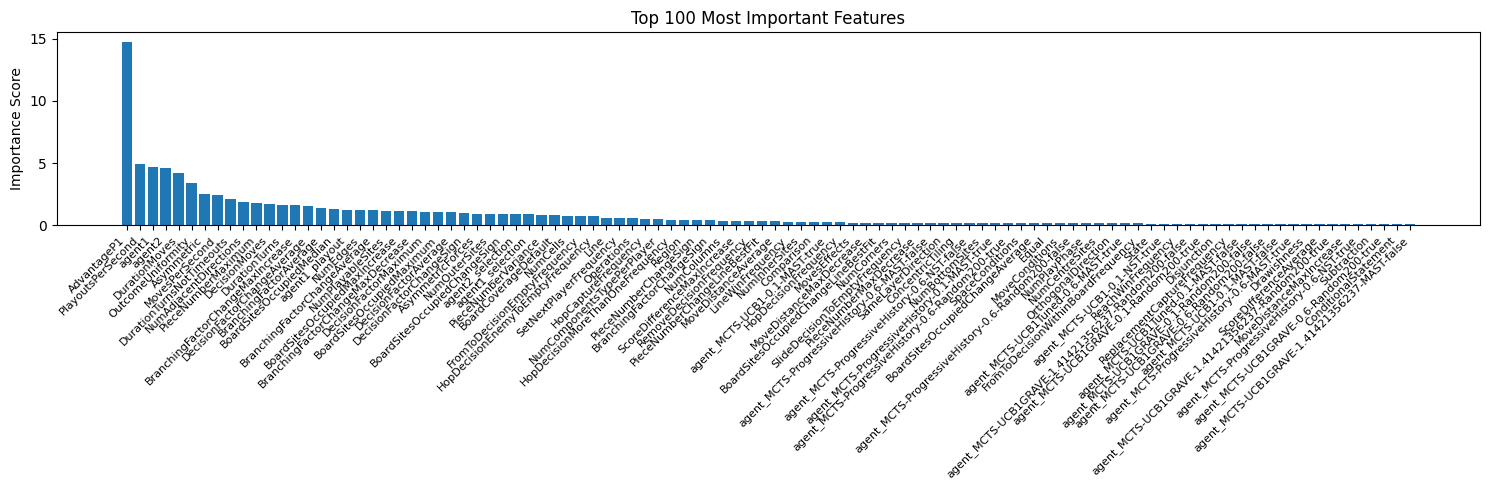

Fold 5 - RMSE: 0.40878595673292617
List of oof scores: [0.42020773720267796, 0.4324039841045965, 0.4200207824980687, 0.43883002408231137, 0.40878595673292617]
Average oof score: 0.42404969692411615


In [10]:
# call the function
trained_models1, oof1, oof_scores1, importance_df1 = train_models(
    df_train, 
    numerical_cols, 
    categorical_cols, 
    text_cols=text_cols,
    split_list=split1,
)
# save oof predictions
#oof1.to_parquet(path_results / 'oof_catboost_fs24_cv1.parquet', index=False)
oof1.to_parquet(path_results / 'oof_catboost_fsv2_cv1.parquet', index=False)

# save feature importance
# importance_df1.to_csv(path_results / 'feat_importance_catboost_cv1_fs.csv', index=False)

Fold 1
0:	learn: 0.6179730	test: 0.5305960	best: 0.5305960 (0)	total: 69.3ms	remaining: 3m 27s
50:	learn: 0.3954474	test: 0.4525876	best: 0.4525876 (50)	total: 4.06s	remaining: 3m 54s
100:	learn: 0.3561240	test: 0.4373039	best: 0.4373039 (100)	total: 8.25s	remaining: 3m 56s
150:	learn: 0.3350875	test: 0.4311392	best: 0.4311392 (150)	total: 12.4s	remaining: 3m 54s
200:	learn: 0.3216733	test: 0.4285546	best: 0.4285546 (200)	total: 16.5s	remaining: 3m 50s
250:	learn: 0.3110214	test: 0.4259746	best: 0.4259746 (250)	total: 20.8s	remaining: 3m 47s
300:	learn: 0.3025407	test: 0.4247559	best: 0.4247417 (299)	total: 25s	remaining: 3m 43s
350:	learn: 0.2950943	test: 0.4234899	best: 0.4234899 (350)	total: 29.2s	remaining: 3m 40s
400:	learn: 0.2889326	test: 0.4223505	best: 0.4223496 (399)	total: 33.4s	remaining: 3m 36s
450:	learn: 0.2837193	test: 0.4216155	best: 0.4216155 (450)	total: 37.7s	remaining: 3m 33s
500:	learn: 0.2783434	test: 0.4209113	best: 0.4209089 (499)	total: 41.9s	remaining: 3m 28s

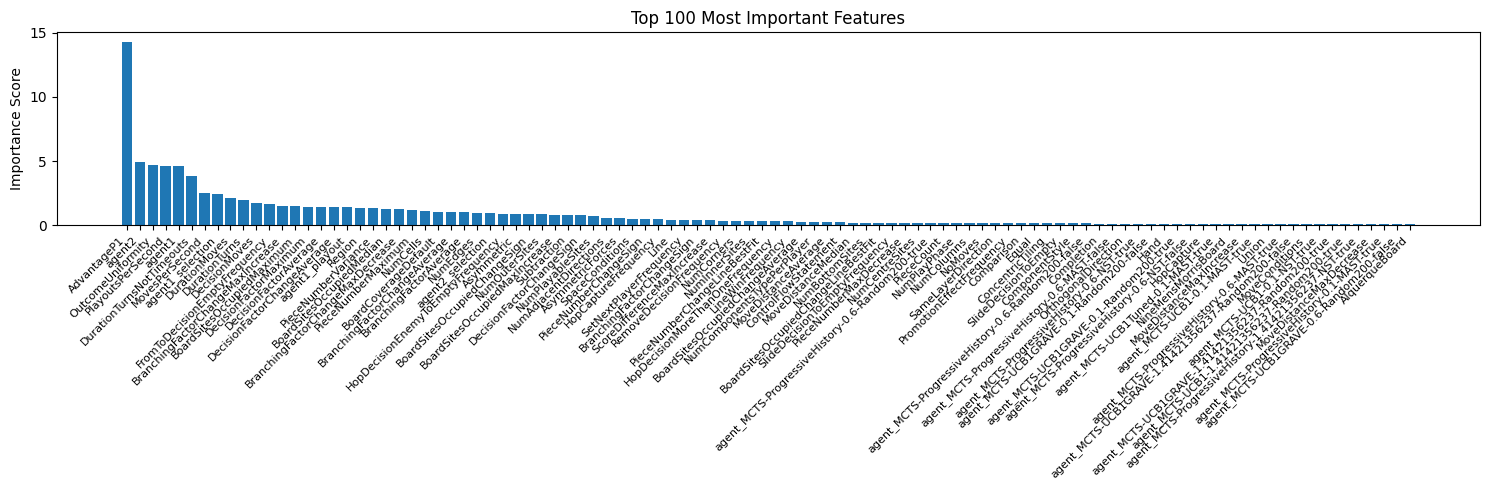

Fold 1 - RMSE: 0.41415078977810954
Fold 2
0:	learn: 0.6142322	test: 0.5362127	best: 0.5362127 (0)	total: 77.7ms	remaining: 3m 53s
50:	learn: 0.3947653	test: 0.4305427	best: 0.4305427 (50)	total: 4.14s	remaining: 3m 59s
100:	learn: 0.3575554	test: 0.4192451	best: 0.4192451 (100)	total: 8.35s	remaining: 3m 59s
150:	learn: 0.3373456	test: 0.4137226	best: 0.4137226 (150)	total: 12.7s	remaining: 3m 59s
200:	learn: 0.3228411	test: 0.4112809	best: 0.4112809 (200)	total: 16.9s	remaining: 3m 54s
250:	learn: 0.3112701	test: 0.4097506	best: 0.4097358 (244)	total: 21s	remaining: 3m 50s
300:	learn: 0.3030885	test: 0.4087524	best: 0.4087229 (294)	total: 25.4s	remaining: 3m 47s
350:	learn: 0.2949911	test: 0.4078472	best: 0.4078472 (350)	total: 29.6s	remaining: 3m 43s
400:	learn: 0.2887333	test: 0.4072133	best: 0.4071797 (399)	total: 34s	remaining: 3m 40s
450:	learn: 0.2835932	test: 0.4067778	best: 0.4067602 (449)	total: 38.4s	remaining: 3m 36s
500:	learn: 0.2783516	test: 0.4063344	best: 0.4063344 (50

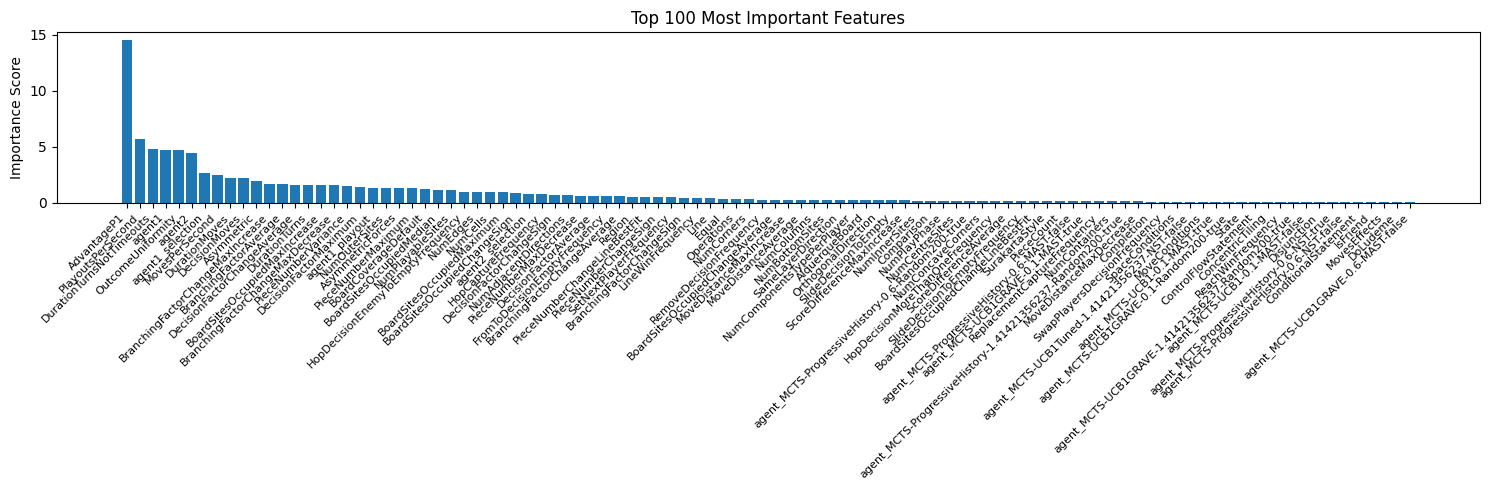

Fold 2 - RMSE: 0.4042871918407263
Fold 3
0:	learn: 0.6019271	test: 0.6038098	best: 0.6038098 (0)	total: 73.8ms	remaining: 3m 41s
50:	learn: 0.3871725	test: 0.4752342	best: 0.4752342 (50)	total: 4.04s	remaining: 3m 53s
100:	learn: 0.3540238	test: 0.4536532	best: 0.4536532 (100)	total: 8.45s	remaining: 4m 2s
150:	learn: 0.3315358	test: 0.4424974	best: 0.4424974 (150)	total: 12.7s	remaining: 4m
200:	learn: 0.3177074	test: 0.4371227	best: 0.4371227 (200)	total: 16.9s	remaining: 3m 55s
250:	learn: 0.3076133	test: 0.4343369	best: 0.4343369 (250)	total: 21.3s	remaining: 3m 53s
300:	learn: 0.2990275	test: 0.4316388	best: 0.4316388 (300)	total: 25.6s	remaining: 3m 49s
350:	learn: 0.2913816	test: 0.4299546	best: 0.4299546 (350)	total: 29.8s	remaining: 3m 44s
400:	learn: 0.2850694	test: 0.4287809	best: 0.4286689 (398)	total: 34.1s	remaining: 3m 40s
450:	learn: 0.2796589	test: 0.4273653	best: 0.4273653 (450)	total: 38.4s	remaining: 3m 36s
500:	learn: 0.2748290	test: 0.4263385	best: 0.4263385 (500)

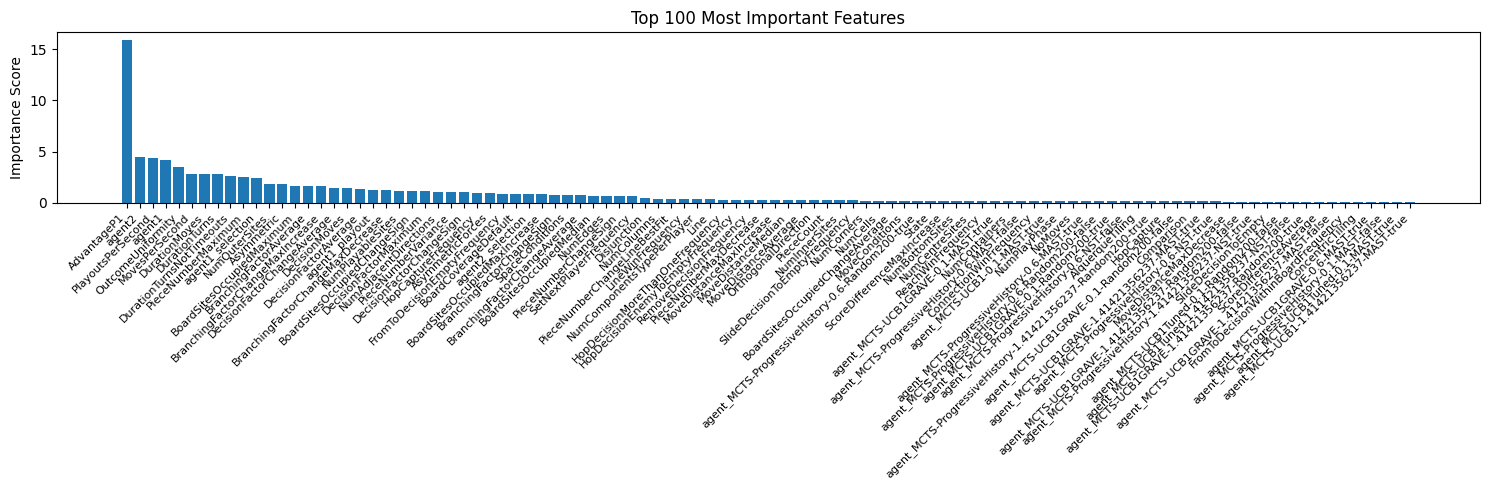

Fold 3 - RMSE: 0.41852457654158653
Fold 4
0:	learn: 0.6037836	test: 0.5968063	best: 0.5968063 (0)	total: 72.1ms	remaining: 3m 36s
50:	learn: 0.3930792	test: 0.4767840	best: 0.4767840 (50)	total: 4.09s	remaining: 3m 56s
100:	learn: 0.3583506	test: 0.4601624	best: 0.4601624 (100)	total: 8.45s	remaining: 4m 2s
150:	learn: 0.3389001	test: 0.4513234	best: 0.4513234 (150)	total: 12.8s	remaining: 4m 1s
200:	learn: 0.3246946	test: 0.4467195	best: 0.4467195 (200)	total: 17.1s	remaining: 3m 58s
250:	learn: 0.3142236	test: 0.4441603	best: 0.4441603 (250)	total: 21.4s	remaining: 3m 54s
300:	learn: 0.3059741	test: 0.4420807	best: 0.4420807 (300)	total: 25.8s	remaining: 3m 51s
350:	learn: 0.2984124	test: 0.4412220	best: 0.4412220 (350)	total: 30.2s	remaining: 3m 47s
400:	learn: 0.2924463	test: 0.4403895	best: 0.4403895 (400)	total: 34.5s	remaining: 3m 43s
450:	learn: 0.2867765	test: 0.4398973	best: 0.4398973 (450)	total: 39s	remaining: 3m 40s
500:	learn: 0.2816190	test: 0.4388104	best: 0.4388104 (50

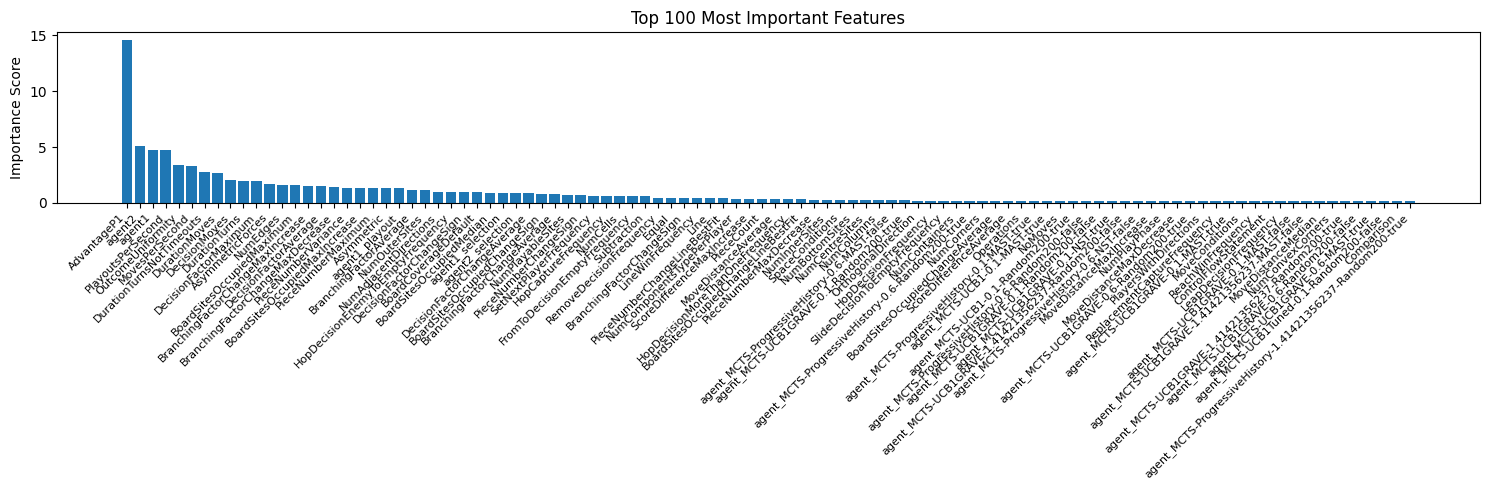

Fold 4 - RMSE: 0.430937224432358
Fold 5
0:	learn: 0.6052103	test: 0.5860114	best: 0.5860114 (0)	total: 64.4ms	remaining: 3m 13s
50:	learn: 0.3862473	test: 0.4793432	best: 0.4793432 (50)	total: 4.04s	remaining: 3m 53s
100:	learn: 0.3533455	test: 0.4623909	best: 0.4623680 (98)	total: 8.37s	remaining: 4m
150:	learn: 0.3333885	test: 0.4525453	best: 0.4525453 (150)	total: 12.6s	remaining: 3m 57s
200:	learn: 0.3197054	test: 0.4486482	best: 0.4486482 (200)	total: 16.8s	remaining: 3m 53s
250:	learn: 0.3092685	test: 0.4457382	best: 0.4457382 (250)	total: 21s	remaining: 3m 50s
300:	learn: 0.3008702	test: 0.4439392	best: 0.4439392 (300)	total: 25.4s	remaining: 3m 47s
350:	learn: 0.2934007	test: 0.4418470	best: 0.4418470 (350)	total: 29.8s	remaining: 3m 44s
400:	learn: 0.2868893	test: 0.4410639	best: 0.4409846 (393)	total: 34.4s	remaining: 3m 42s
450:	learn: 0.2814924	test: 0.4399761	best: 0.4399761 (450)	total: 39.1s	remaining: 3m 40s
500:	learn: 0.2765652	test: 0.4391319	best: 0.4391319 (500)	to

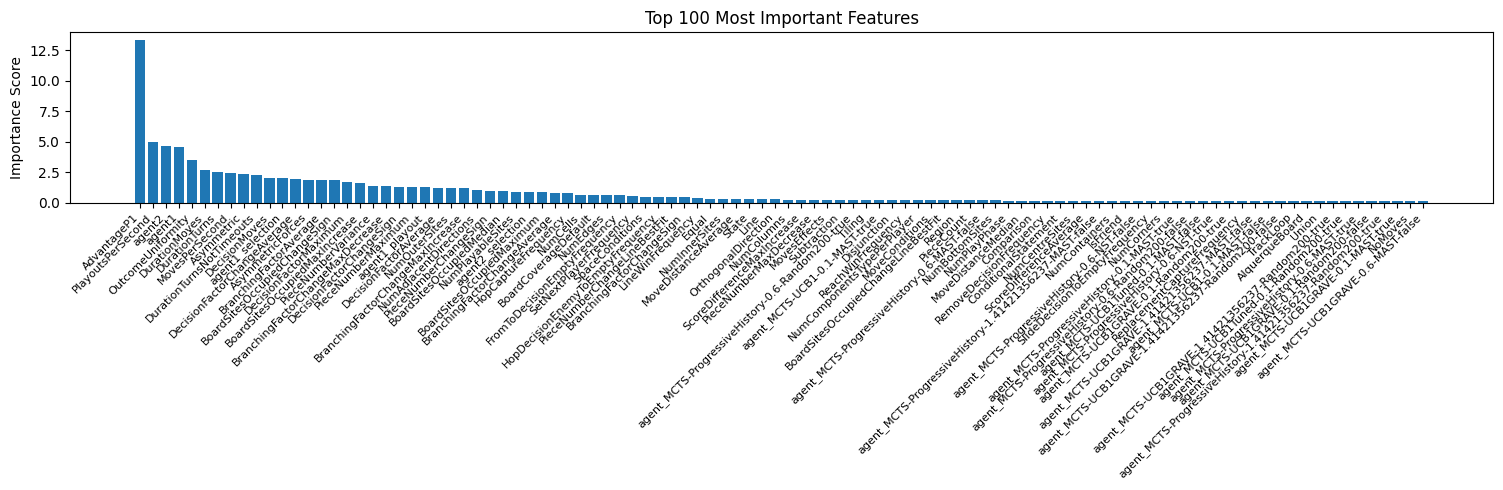

Fold 5 - RMSE: 0.43169015341766026
List of oof scores: [0.41415078977810954, 0.4042871918407263, 0.41852457654158653, 0.430937224432358, 0.43169015341766026]
Average oof score: 0.4199179872020881


In [11]:
# call the function
trained_models2, oof2, oof_scores2, importance_df2 = train_models(
    df_train, 
    numerical_cols, 
    categorical_cols, 
    text_cols=text_cols,
    split_list=split2,
)
# save oof predictions
# oof2.to_parquet(path_results / 'oof_catboost_fs24_cv2.parquet', index=False)
oof2.to_parquet(path_results / 'oof_catboost_fsv2_cv2.parquet', index=False)

Fold 1
0:	learn: 0.6090501	test: 0.5667848	best: 0.5667848 (0)	total: 66.6ms	remaining: 3m 19s
50:	learn: 0.3923328	test: 0.4679866	best: 0.4679866 (50)	total: 4.15s	remaining: 3m 59s
100:	learn: 0.3580883	test: 0.4547506	best: 0.4547506 (100)	total: 8.47s	remaining: 4m 3s
150:	learn: 0.3363389	test: 0.4479347	best: 0.4479347 (150)	total: 12.7s	remaining: 3m 59s
200:	learn: 0.3215268	test: 0.4441820	best: 0.4441820 (200)	total: 16.9s	remaining: 3m 54s
250:	learn: 0.3117665	test: 0.4413970	best: 0.4413970 (250)	total: 21.2s	remaining: 3m 51s
300:	learn: 0.3027107	test: 0.4395872	best: 0.4395872 (300)	total: 25.5s	remaining: 3m 48s
350:	learn: 0.2952399	test: 0.4384056	best: 0.4384056 (350)	total: 29.9s	remaining: 3m 45s
400:	learn: 0.2889277	test: 0.4377860	best: 0.4377285 (393)	total: 34.2s	remaining: 3m 41s
450:	learn: 0.2828846	test: 0.4368739	best: 0.4368494 (449)	total: 38.5s	remaining: 3m 37s
500:	learn: 0.2779044	test: 0.4355892	best: 0.4355892 (500)	total: 42.8s	remaining: 3m 33

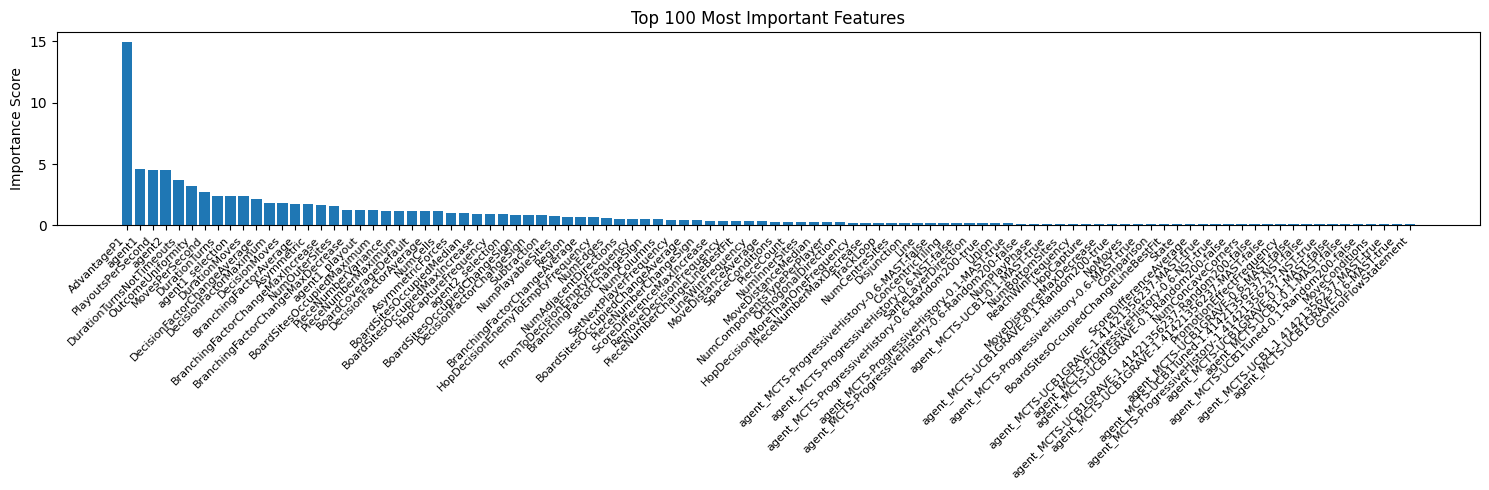

Fold 1 - RMSE: 0.4301831332122036
Fold 2
0:	learn: 0.6078976	test: 0.5745262	best: 0.5745262 (0)	total: 73.7ms	remaining: 3m 40s
50:	learn: 0.3913007	test: 0.4722502	best: 0.4722502 (50)	total: 4.03s	remaining: 3m 53s
100:	learn: 0.3560622	test: 0.4518448	best: 0.4518448 (100)	total: 8.34s	remaining: 3m 59s
150:	learn: 0.3361833	test: 0.4424160	best: 0.4424160 (150)	total: 12.6s	remaining: 3m 57s
200:	learn: 0.3221037	test: 0.4371843	best: 0.4371843 (200)	total: 16.8s	remaining: 3m 53s
250:	learn: 0.3114365	test: 0.4340453	best: 0.4340453 (250)	total: 21s	remaining: 3m 50s
300:	learn: 0.3019746	test: 0.4310575	best: 0.4310575 (300)	total: 25.3s	remaining: 3m 46s
350:	learn: 0.2951635	test: 0.4292329	best: 0.4292329 (350)	total: 29.6s	remaining: 3m 43s
400:	learn: 0.2883215	test: 0.4273148	best: 0.4273148 (400)	total: 33.8s	remaining: 3m 38s
450:	learn: 0.2825877	test: 0.4258995	best: 0.4258995 (450)	total: 38.1s	remaining: 3m 35s
500:	learn: 0.2775106	test: 0.4250722	best: 0.4250722 (5

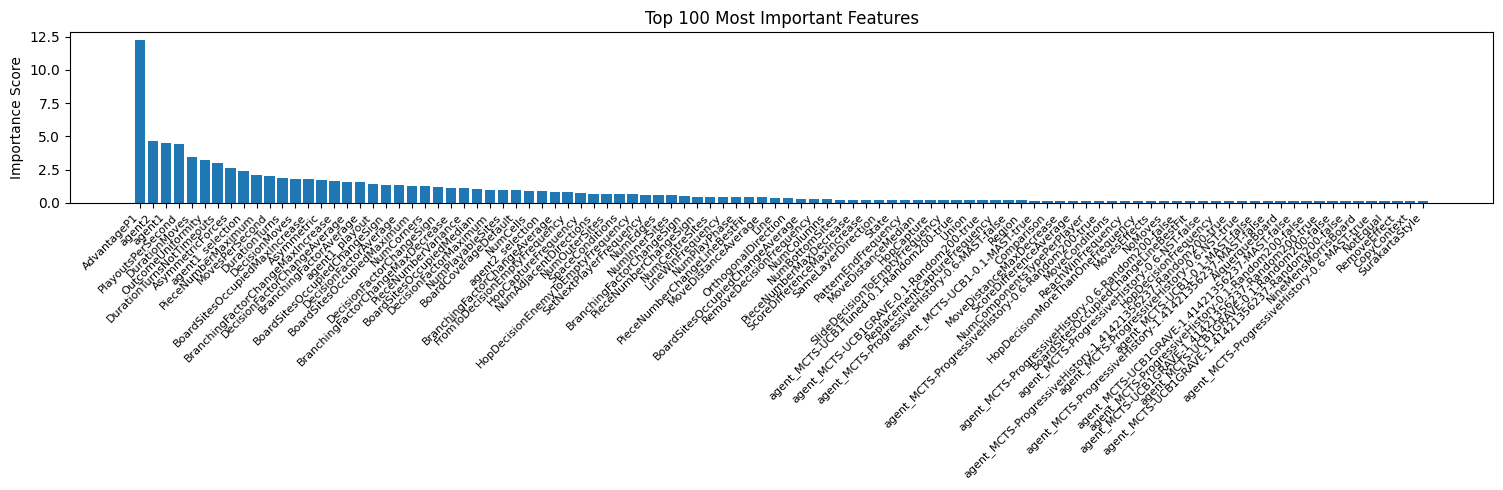

Fold 2 - RMSE: 0.41651074513452174
Fold 3
0:	learn: 0.6104678	test: 0.5718899	best: 0.5718899 (0)	total: 73.7ms	remaining: 3m 41s
50:	learn: 0.3923510	test: 0.4694491	best: 0.4694491 (50)	total: 4.14s	remaining: 3m 59s
100:	learn: 0.3537207	test: 0.4513861	best: 0.4513861 (100)	total: 8.4s	remaining: 4m 1s
150:	learn: 0.3324534	test: 0.4447014	best: 0.4447014 (150)	total: 12.6s	remaining: 3m 58s
200:	learn: 0.3173044	test: 0.4414680	best: 0.4414680 (200)	total: 16.8s	remaining: 3m 54s
250:	learn: 0.3068203	test: 0.4390685	best: 0.4390685 (250)	total: 21.1s	remaining: 3m 50s
300:	learn: 0.2990151	test: 0.4369770	best: 0.4369770 (300)	total: 25.3s	remaining: 3m 47s
350:	learn: 0.2913558	test: 0.4353116	best: 0.4353116 (350)	total: 29.7s	remaining: 3m 43s
400:	learn: 0.2858357	test: 0.4341822	best: 0.4341822 (400)	total: 34s	remaining: 3m 40s
450:	learn: 0.2799427	test: 0.4333452	best: 0.4333182 (447)	total: 38.2s	remaining: 3m 36s
500:	learn: 0.2750233	test: 0.4325073	best: 0.4325070 (49

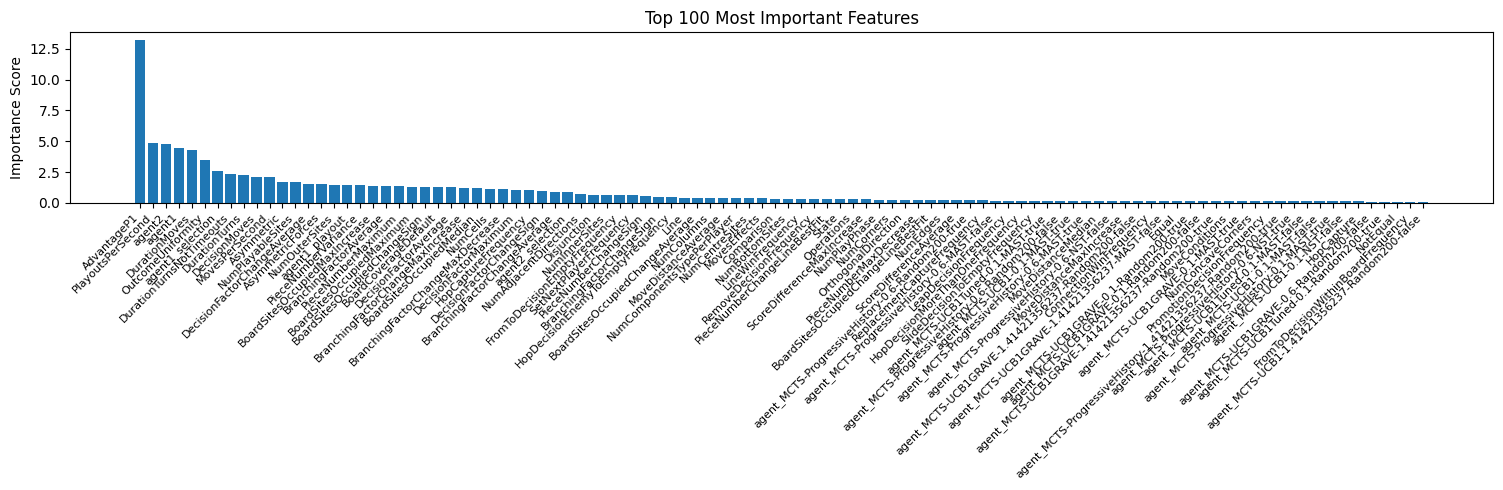

Fold 3 - RMSE: 0.4255419321552399
Fold 4
0:	learn: 0.6105064	test: 0.5637974	best: 0.5637974 (0)	total: 80.6ms	remaining: 4m 1s
50:	learn: 0.3943561	test: 0.4541335	best: 0.4541335 (50)	total: 4.13s	remaining: 3m 58s
100:	learn: 0.3579305	test: 0.4390875	best: 0.4390875 (100)	total: 8.47s	remaining: 4m 3s
150:	learn: 0.3377578	test: 0.4335768	best: 0.4334230 (148)	total: 12.7s	remaining: 3m 59s
200:	learn: 0.3249773	test: 0.4299184	best: 0.4299184 (200)	total: 17s	remaining: 3m 56s
250:	learn: 0.3145988	test: 0.4276173	best: 0.4276173 (250)	total: 21.3s	remaining: 3m 52s
300:	learn: 0.3056273	test: 0.4255294	best: 0.4255043 (299)	total: 25.5s	remaining: 3m 48s
350:	learn: 0.2982400	test: 0.4238513	best: 0.4238156 (349)	total: 29.9s	remaining: 3m 45s
400:	learn: 0.2915465	test: 0.4227442	best: 0.4227442 (400)	total: 34.2s	remaining: 3m 41s
450:	learn: 0.2855637	test: 0.4213608	best: 0.4213608 (450)	total: 38.4s	remaining: 3m 37s
500:	learn: 0.2810546	test: 0.4203732	best: 0.4203517 (499

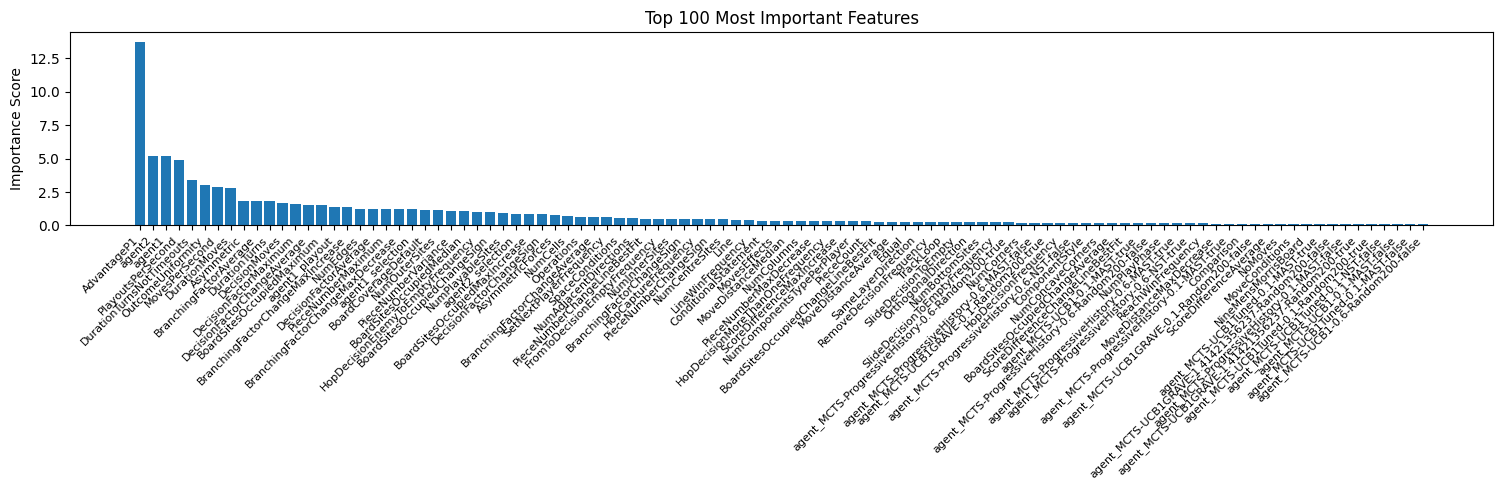

Fold 4 - RMSE: 0.4137199572223188
Fold 5
0:	learn: 0.6058645	test: 0.5821454	best: 0.5821454 (0)	total: 67.1ms	remaining: 3m 21s
50:	learn: 0.3950269	test: 0.4705523	best: 0.4705523 (50)	total: 4.17s	remaining: 4m 1s
100:	learn: 0.3593282	test: 0.4534261	best: 0.4534261 (100)	total: 8.43s	remaining: 4m 2s
150:	learn: 0.3377037	test: 0.4444314	best: 0.4444314 (150)	total: 12.7s	remaining: 4m
200:	learn: 0.3234813	test: 0.4394551	best: 0.4394551 (200)	total: 17s	remaining: 3m 56s
250:	learn: 0.3129980	test: 0.4359870	best: 0.4359870 (250)	total: 21.2s	remaining: 3m 52s
300:	learn: 0.3040284	test: 0.4339726	best: 0.4339726 (300)	total: 25.5s	remaining: 3m 48s
350:	learn: 0.2965936	test: 0.4317857	best: 0.4317857 (350)	total: 29.8s	remaining: 3m 45s
400:	learn: 0.2905653	test: 0.4308336	best: 0.4307454 (397)	total: 34.2s	remaining: 3m 41s
450:	learn: 0.2845877	test: 0.4295396	best: 0.4295396 (450)	total: 38.6s	remaining: 3m 38s
500:	learn: 0.2795747	test: 0.4286073	best: 0.4285571 (498)	to

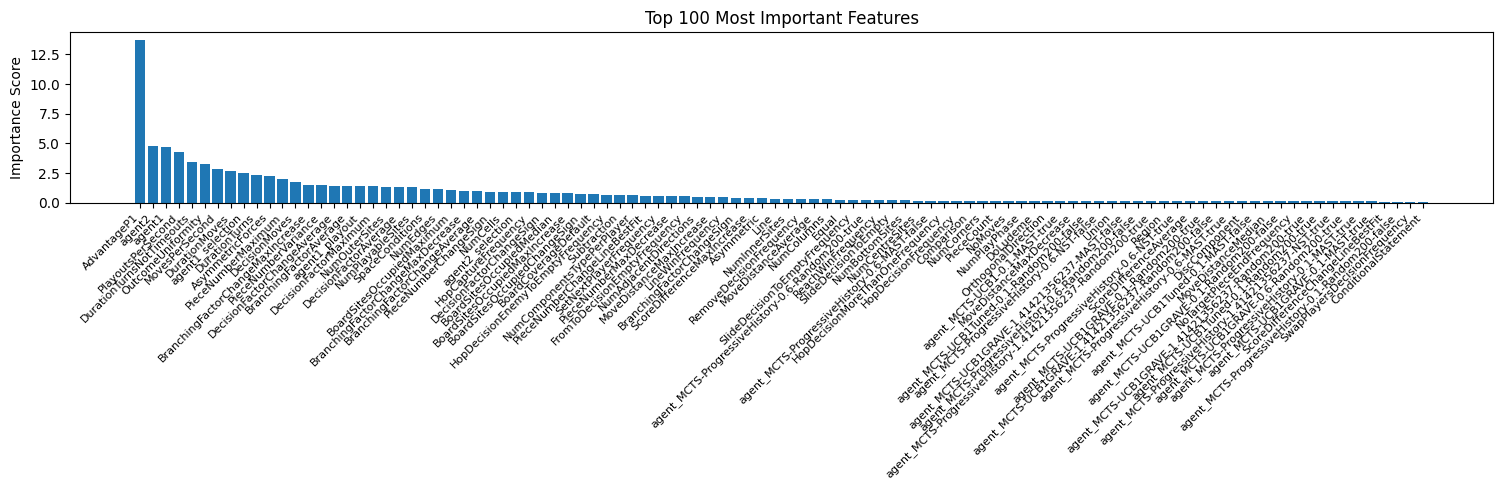

Fold 5 - RMSE: 0.4212937740802189
List of oof scores: [0.4301831332122036, 0.41651074513452174, 0.4255419321552399, 0.4137199572223188, 0.4212937740802189]
Average oof score: 0.42144990836090057


In [12]:
# call the function
trained_models3, oof3, oof_scores3, importance_df3 = train_models(
    df_train, 
    numerical_cols, 
    categorical_cols, 
    text_cols=text_cols,
    split_list=split3,
)
# save oof predictions
# oof3.to_parquet(path_results / 'oof_catboost_fs24_cv3.parquet', index=False)
oof3.to_parquet(path_results / 'oof_catboost_fsv2_cv3.parquet', index=False)

In [13]:
trained_models = [*trained_models1, *trained_models2, *trained_models3]
# trained_models = trained_models1

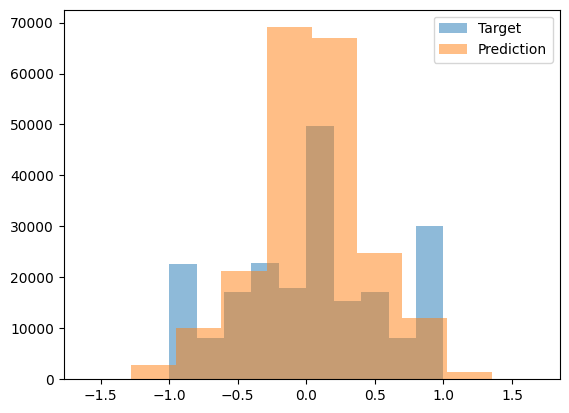

In [14]:
plt.hist(oof1['utility_agent1_true'], alpha=0.5, label='Target')
plt.hist(oof1['utility_agent1_pred'], alpha=0.5, label='Prediction')
plt.legend()
plt.show()

***
### inference

In [15]:
import os
import polars as pl
sys.path.append("../data/raw/")
import kaggle_evaluation.mcts_inference_server

In [16]:
def predict(test: pl.DataFrame, sample_sub: pl.DataFrame):
    # Convert Polars DataFrame to Pandas DataFrame
    test_pd = test.to_pandas()
    
    # Process the test data
    test_processed = process_test_data(
        test_pd,
        numerical_cols,
        categorical_cols,
        encoder,
        scaler,
        include_position_features=True,
        include_text_features=True,
    )

    # Create CatBoost Pool for test data
    test_pool = cb.Pool(
        # data=test_processed[numerical_cols + categorical_cols + text_cols],
        data=test_processed[numerical_cols + categorical_cols],
        cat_features=categorical_cols,
        # text_features=text_cols,
    )

    # Average predictions from all models
    predictions = np.mean([
        model.predict(test_pool)
        for model in trained_models
    ], axis=0)
    predictions = np.clip(predictions, -1, 1)
        
    # Create the submission DataFrame
    submission = sample_sub.with_columns(pl.Series("utility_agent1", predictions))
    
    return submission

In [17]:
# sanity check
df_test = pl.read_csv('../data/raw/test.csv')
sample_sub = pl.read_csv('../data/raw/sample_submission.csv')
predict(df_test, sample_sub)

shape: (3, 2)
┌────────┬────────────────┐
│ Id     ┆ utility_agent1 │
│ ---    ┆ ---            │
│ i64    ┆ f64            │
╞════════╪════════════════╡
│ 233234 ┆ 0.128539       │
│ 233235 ┆ -0.131603      │
│ 233236 ┆ -0.055885      │
└────────┴────────────────┘

In [18]:
inference_server = kaggle_evaluation.mcts_inference_server.MCTSInferenceServer(predict)

if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    inference_server.serve()
else:
    inference_server.run_local_gateway(
        (
            '../data/raw/test.csv',
            '../data/raw/sample_submission.csv'
        )
    )

In [19]:
# Save all artifacts needed for prediction
catboost_predict = {
    'models': trained_models,
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'text_cols': text_cols,
    'encoder': encoder, 
    'scaler': scaler
}

# with open('./catboost_predict_fs24.pkl', 'wb') as f:
#     pickle.dump(catboost_predict, f)

with open('./catboost_predict_fsv2.pkl', 'wb') as f:
    pickle.dump(catboost_predict, f)


***